# Customer Attrition

Customer attrition, also known as customer churn, customer turnover, or customer defection, is the loss of clients or customers.

Telephone service companies, Internet service providers, pay TV companies, insurance firms, and alarm monitoring services, often use customer attrition analysis and customer attrition rates as one of their key business metrics  because the cost of retaining an existing customer is far less than acquiring a new one. Companies from these sectors often have customer service branches which attempt to win back defecting clients, because recovered long-term customers can be worth much more to a company than newly recruited clients.

Companies usually make a distinction between voluntary churn and involuntary churn. Voluntary churn occurs due to a decision by the customer to switch to another company or service provider, involuntary churn occurs due to circumstances such as a customer's relocation to a long-term care facility, death, or the relocation to a distant location. In most applications, involuntary reasons for churn are excluded from the analytical models. Analysts tend to concentrate on voluntary churn, because it typically occurs due to factors of the company-customer relationship which companies control, such as how billing interactions are handled or how after-sales help is provided.

predictive analytics  use churn prediction models that predict customer churn by assessing their propensity of risk to churn. Since these models generate a small prioritized list of potential defectors, they are effective at focusing customer retention marketing programs on the subset of the customer base who are most vulnerable to churn.

In [46]:
#Importing libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# Input data files are available in the "../input/" directory.
import os
import matplotlib.pyplot as plt#visualization
from PIL import  Image
%matplotlib inline
import pandas as pd
import seaborn as sns#visualization
import itertools
import warnings
warnings.filterwarnings("ignore")
import io
import plotly.offline as py#visualization
py.init_notebook_mode(connected=True)#visualization
import plotly.graph_objs as go#visualization
import plotly.tools as tls#visualization
import plotly.figure_factory as ff#visualization

In [47]:
maindata= pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [48]:
maindata.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [49]:
#Data Manipulation

#Replacing spaces with null values in total charges column
maindata['TotalCharges'] = maindata["TotalCharges"].replace(" ",np.nan)

#Dropping null values from total charges column which contain .15% missing data 
maindata = maindata[maindata["TotalCharges"].notnull()]
maindata = maindata.reset_index()[maindata.columns]

#convert to float type
maindata["TotalCharges"] = maindata["TotalCharges"].astype(float)

#replace 'No internet service' to No for the following columns
replace_cols = [ 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                'TechSupport','StreamingTV', 'StreamingMovies']
for i in replace_cols : 
    maindata[i]  = maindata[i].replace({'No internet service' : 'No'})
    
#replace values
maindata["SeniorCitizen"] = maindata["SeniorCitizen"].replace({1:"Yes",0:"No"})

#Tenure to categorical column
def tenure_lab(maindata) :
    
    if maindata["tenure"] <= 12 :
        return "Tenure_0-12"
    elif (maindata["tenure"] > 12) & (maindata["tenure"] <= 24 ):
        return "Tenure_12-24"
    elif (maindata["tenure"] > 24) & (maindata["tenure"] <= 48) :
        return "Tenure_24-48"
    elif (maindata["tenure"] > 48) & (maindata["tenure"] <= 60) :
        return "Tenure_48-60"
    elif maindata["tenure"] > 60 :
        return "Tenure_gt_60"
maindata["tenure_group"] = maindata.apply(lambda maindata:tenure_lab(maindata),
                                      axis = 1)

#Separating churn and non churn customers
churn     = maindata[maindata["Churn"] == "Yes"]
not_churn = maindata[maindata["Churn"] == "No"]

#Separating catagorical and numerical columns
Id_col     = ['customerID']
target_col = ["Churn"]
cat_cols   = maindata.nunique()[maindata.nunique() < 6].keys().tolist()
cat_cols   = [x for x in cat_cols if x not in target_col]
num_cols   = [x for x in maindata.columns if x not in cat_cols + target_col + Id_col]

In [50]:
maindata.Churn.value_counts()

No     5163
Yes    1869
Name: Churn, dtype: int64

In [51]:
    import plotly.express as px
    # This dataframe has 244 lines, but 4 distinct values for `day`
    #df = px.data.tips()
    fig = px.pie(maindata, names='Churn',labels=["Yes","No"])
    fig.show()


In [52]:
churn.dtypes

customerID           object
gender               object
SeniorCitizen        object
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
tenure_group         object
dtype: object

In [53]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots


# Create subplots: use 'domain' type for Pie subplot
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=["Female","Male"], values=churn.gender.value_counts()),
              1, 1)
fig.add_trace(go.Pie(labels=["Male","Female"], values=not_churn.gender.value_counts()),
              1, 2)

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.4, hoverinfo="label+percent+name")

fig.update_layout(
    title_text="Gender in Churn and Non Churn Data",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='Churn', x=0.18, y=0.5, font_size=20, showarrow=False),
                 dict(text='No Churn', x=0.84, y=0.5, font_size=20, showarrow=False)])
fig.show()
# Create subplots: use 'domain' type for Pie subplot
fig2 = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig2.add_trace(go.Pie(labels=["No","Yes"], values=churn.SeniorCitizen.value_counts()),
              1, 1)
fig2.add_trace(go.Pie(labels=["No","Yes"], values=not_churn.SeniorCitizen.value_counts()),
              1, 2)

# Use `hole` to create a donut-like pie chart
fig2.update_traces(hole=.4, hoverinfo="label+percent+name")

fig2.update_layout(
    title_text="Senior People in Churn and Non Churn Data",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='Churn', x=0.18, y=0.5, font_size=20, showarrow=False),
                 dict(text='No Churn', x=0.84, y=0.5, font_size=20, showarrow=False)])
fig2.show()
# Create subplots: use 'domain' type for Pie subplot
fig3 = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig3.add_trace(go.Pie(labels=["No","Yes"], values=churn.Partner.value_counts()),
              1, 1)
fig3.add_trace(go.Pie(labels=["No","Yes"], values=not_churn.Partner.value_counts()),
              1, 2)

# Use `hole` to create a donut-like pie chart
fig3.update_traces(hole=.4, hoverinfo="label+percent+name")

fig3.update_layout(
    title_text="Partner Distribution in Churn and Non Churn Data",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='Churn', x=0.18, y=0.5, font_size=20, showarrow=False),
                 dict(text='No Churn', x=0.84, y=0.5, font_size=20, showarrow=False)])
fig3.show()
# Create subplots: use 'domain' type for Pie subplot
fig4 = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig4.add_trace(go.Pie(labels=["No","Yes"], values=churn.Dependents.value_counts()),
              1, 1)
fig4.add_trace(go.Pie(labels=["No","Yes"], values=not_churn.Dependents.value_counts()),
              1, 2)

# Use `hole` to create a donut-like pie chart
fig4.update_traces(hole=.4, hoverinfo="label+percent+name")

fig4.update_layout(
    title_text="Dependents in Churn and Non Churn Data",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='Churn', x=0.18, y=0.5, font_size=20, showarrow=False),
                 dict(text='No Churn', x=0.84, y=0.5, font_size=20, showarrow=False)])
fig4.show()
# Create subplots: use 'domain' type for Pie subplot
fig5 = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig5.add_trace(go.Pie(labels=churn.InternetService.unique(), values=churn.InternetService.value_counts()),
              1, 1)
fig5.add_trace(go.Pie(labels=not_churn.InternetService.unique(), values=not_churn.InternetService.value_counts()),
              1, 2)

# Use `hole` to create a donut-like pie chart
fig5.update_traces(hole=.4, hoverinfo="label+percent+name")

fig5.update_layout(
    title_text="Internet Service in Churn and Non Churn Data",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='Churn', x=0.18, y=0.5, font_size=20, showarrow=False),
                 dict(text='No Churn', x=0.84, y=0.5, font_size=20, showarrow=False)])
fig5.show()
# Create subplots: use 'domain' type for Pie subplot
fig6 = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig6.add_trace(go.Pie(labels=churn.tenure_group.unique(), values=churn.tenure_group.value_counts()),
              1, 1)
fig6.add_trace(go.Pie(labels=not_churn.tenure_group.unique(), values=not_churn.tenure_group.value_counts()),
              1, 2)

# Use `hole` to create a donut-like pie chart
fig6.update_traces(hole=.4, hoverinfo="label+percent+name")

fig6.update_layout(
    title_text="Tenure in Churn and Non Churn Data",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='Churn', x=0.18, y=0.5, font_size=20, showarrow=False),
                 dict(text='No Churn', x=0.84, y=0.5, font_size=20, showarrow=False)])
fig6.show()

In [54]:
#cusomer attrition in tenure groups
tg_ch  =  churn["tenure_group"].value_counts().reset_index()
tg_ch.columns  = ["tenure_group","count"]
tg_nch =  not_churn["tenure_group"].value_counts().reset_index()
tg_nch.columns = ["tenure_group","count"]

#bar - churn
tr1 = go.Bar(x = tg_ch["tenure_group"]  , y = tg_ch["count"],
                name = "Churn Customers",
                marker = dict(line = dict(width = .5,color = "black")),
                opacity = .9)

#bar - not churn
tr2 = go.Bar(x = tg_nch["tenure_group"] , y = tg_nch["count"],
                name = "Non Churn Customers",
                marker = dict(line = dict(width = .5,color = "black")),
                opacity = .9)

layout = go.Layout(dict(title = "Customer attrition in tenure groups",
                        plot_bgcolor  = "rgb(243,243,243)",
                        paper_bgcolor = "rgb(243,243,243)",
                        xaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                     title = "tenure group",
                                     zerolinewidth=1,ticklen=5,gridwidth=2),
                        yaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                     title = "count",
                                     zerolinewidth=1,ticklen=5,gridwidth=2),
                       )
                  )
data = [tr1,tr2]
fig  = go.Figure(data=data,layout=layout)
py.iplot(fig)

In [55]:
import plotly.express as px

fig = px.scatter(maindata, y='TotalCharges', x='MonthlyCharges',
              color='tenure_group',)
fig.show()

In [56]:

fig = px.scatter(maindata, y='TotalCharges', x='MonthlyCharges',
              color='Churn')
fig.show()

In [57]:
avg_tgc = maindata.groupby(["tenure_group","Churn"])[["MonthlyCharges","TotalCharges"]].mean().reset_index()

#function for tracing 
def mean_charges(column,aggregate) :
    tracer = go.Bar(x = avg_tgc[avg_tgc["Churn"] == aggregate]["tenure_group"],
                    y = avg_tgc[avg_tgc["Churn"] == aggregate][column],
                    name = aggregate,marker = dict(line = dict(width = 1)),
                    text = "Churn"
                   )
    return tracer

#function for layout
def layout_plot(title,xaxis_lab,yaxis_lab) :
    layout = go.Layout(dict(title = title,
                            plot_bgcolor  = "rgb(243,243,243)",
                            paper_bgcolor = "rgb(243,243,243)",
                            xaxis = dict(gridcolor = 'rgb(255, 255, 255)',title = xaxis_lab,
                                         zerolinewidth=1,ticklen=5,gridwidth=2),
                            yaxis = dict(gridcolor = 'rgb(255, 255, 255)',title = yaxis_lab,
                                         zerolinewidth=1,ticklen=5,gridwidth=2),
                           )
                      )
    return layout
    

#plot1 - mean monthly charges by tenure groups
tr1  = mean_charges("MonthlyCharges","Yes")
tr2  = mean_charges("MonthlyCharges","No")
l1 = layout_plot("Average Monthly Charges by different groups",
                      "Tenure group","Monthly Charges")
d1   = [tr1,tr2]
fig1    = go.Figure(data=d1,layout=l1)

#plot2 - mean total charges by tenure groups
tr3  = mean_charges("TotalCharges","Yes")
tr4  = mean_charges("TotalCharges","No")
l2 = layout_plot("Average Total Charges by different groups",
                      "Tenure group","Total Charges")
d2   = [tr3,tr4]
fig2    = go.Figure(data=d2,layout=l2)

py.iplot(fig1)
py.iplot(fig2)

In [93]:
churn[churn.tenure_group=="Tenure_0-12"].shape

(1037, 22)

In [58]:
maindata2=maindata.copy()

In [59]:
maindata.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Tenure_0-12
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,Tenure_24-48
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Tenure_0-12
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Tenure_24-48
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Tenure_0-12


In [60]:
t1=maindata2.groupby("customerID").sum()

In [61]:
t1.head()

,tenure,MonthlyCharges,TotalCharges
customerID,,,
0002-ORFBO,9,65.6,593.30
0003-MKNFE,9,59.9,542.40
0004-TLHLJ,4,73.9,280.85
0011-IGKFF,13,98.0,1237.85
0013-EXCHZ,3,83.9,267.40


In [62]:
#Standardizing
from sklearn.preprocessing import StandardScaler
corscalar=StandardScaler()
corscalar.fit(t1)
t1stan=pd.DataFrame(corscalar.transform(t1),columns=t1.columns,index=t1.index)

In [63]:
#Scree Plot/Elbow Curve
from sklearn.cluster import KMeans

wss= {}
for k in range(1, 15):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(t1stan)
    #clusters = kmeans.labels_
    wss[k] = kmeans.inertia_ 
    # Inertia: Sum of squared distances of samples to their closest cluster center
wss


{1: 21096.0,
 2: 9700.829985495955,
 3: 6176.72382352576,
 4: 4144.603347638029,
 5: 3108.2430632825217,
 6: 2559.884546796478,
 7: 2177.350529183682,
 8: 1861.128888625094,
 9: 1620.5005447563547,
 10: 1410.6175772826464,
 11: 1230.629385379825,
 12: 1110.3070611404878,
 13: 1021.253731964553,
 14: 940.243884900794}

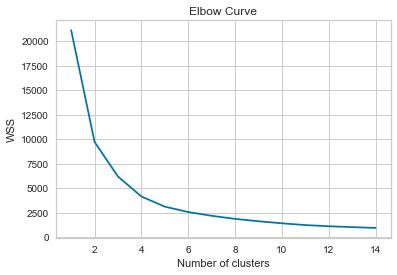

In [64]:
plt.figure()
plt.plot(list(wss.keys()), list(wss.values()))
plt.xlabel("Number of clusters")
plt.ylabel("WSS")
plt.title("Elbow Curve")
plt.show()

In [65]:

from sklearn.cluster import KMeans
t1kmean = KMeans(n_clusters=4)
t1kmean.fit(t1stan)
t1stan["cluster"]=t1kmean.predict(t1stan)
t1stan.head()

,tenure,MonthlyCharges,TotalCharges,cluster
customerID,,,,
0002-ORFBO,-0.954296,0.026652,-0.745607,1
0003-MKNFE,-0.954296,-0.162819,-0.768063,1
0004-TLHLJ,-1.158016,0.302548,-0.883456,1
0011-IGKFF,-0.791321,1.103642,-0.461240,1
0013-EXCHZ,-1.198760,0.634952,-0.889390,1


In [66]:
import plotly.express as px

fig = px.scatter(t1stan, x='tenure', y='TotalCharges',
              color='cluster',size_max=3)
fig.show()

In [67]:
t1kmean.cluster_centers_

array([[ 1.10353022,  0.94761886,  1.43964832],
       [-0.69287089,  0.53144319, -0.45576691],
       [-0.90226131, -1.09761396, -0.87332113],
       [ 0.8618306 , -0.99222785, -0.1967467 ]])

In [68]:
from sklearn.metrics import pairwise_distances_argmin_min

closest, _ = pairwise_distances_argmin_min(t1kmean.cluster_centers_, t1stan.iloc[:,0:3])


In [69]:
closest

array([ 268,  952, 4760, 3721])

In [70]:
t1centers=t1stan.iloc[closest,:]

In [71]:
centersdata=pd.merge(maindata2,t1centers,how="right",on="customerID")

In [72]:
centersdata

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure_x,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,PaperlessBilling,PaymentMethod,MonthlyCharges_x,TotalCharges_x,Churn,tenure_group,tenure_y,MonthlyCharges_y,TotalCharges_y,cluster
0,6713-OKOMC,Female,No,No,No,10,No,No phone service,DSL,Yes,...,No,Mailed check,29.75,301.90,No,Tenure_0-12,-0.913552,-1.165018,-0.874169,2
1,0397-GZBBC,Male,Yes,Yes,No,59,Yes,Yes,Fiber optic,No,...,Yes,Bank transfer (automatic),93.85,5574.75,Yes,Tenure_48-60,1.082902,0.965694,1.452146,0
2,1384-RCUXW,Male,No,No,No,16,Yes,Yes,Fiber optic,No,...,Yes,Mailed check,80.55,1248.90,No,Tenure_12-24,-0.669089,0.523597,-0.456365,1
3,5245-VDBUR,Female,No,Yes,No,52,No,No phone service,DSL,Yes,...,No,Mailed check,35.45,1958.95,No,Tenure_48-60,0.797694,-0.975547,-0.143099,3


In [73]:
centersdata.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure_x', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges_x', 'TotalCharges_x', 'Churn',
       'tenure_group', 'tenure_y', 'MonthlyCharges_y', 'TotalCharges_y',
       'cluster'],
      dtype='object')

In [75]:
centersdata.loc[:,["cluster","tenure_group","SeniorCitizen","tenure_x",'MonthlyCharges_x','TotalCharges_x','Churn','InternetService','StreamingTV','StreamingMovies','Contract']]
#Cluster 1 people are churning.


,cluster,tenure_group,SeniorCitizen,tenure_x,MonthlyCharges_x,TotalCharges_x,Churn,InternetService,StreamingTV,StreamingMovies,Contract
0,2,Tenure_0-12,No,10,29.75,301.90,No,DSL,No,No,Month-to-month
1,0,Tenure_48-60,Yes,59,93.85,5574.75,Yes,Fiber optic,Yes,Yes,Month-to-month
2,1,Tenure_12-24,No,16,80.55,1248.90,No,Fiber optic,No,No,Month-to-month
3,3,Tenure_48-60,No,52,35.45,1958.95,No,DSL,No,No,One year


In [76]:
main=pd.merge(maindata2,t1stan.drop(["tenure","MonthlyCharges","TotalCharges"],axis=1),how="right",on="customerID")
main.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group,cluster
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Tenure_0-12,2
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,No,No,One year,No,Mailed check,56.95,1889.50,No,Tenure_24-48,3
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Tenure_0-12,2
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,...,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Tenure_24-48,3
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Tenure_0-12,1


In [77]:
main.groupby("cluster").mean()

,tenure,MonthlyCharges,TotalCharges
cluster,,,
0,59.530987,93.306224,5548.653887
1,15.445227,80.791201,1252.816564
2,10.277123,31.777771,303.821875
3,53.585850,34.920147,1836.581320


In [78]:
main.groupby("cluster")["Churn"].value_counts()

cluster  Churn
0        No       1611
         Yes       293
1        No       1175
         Yes      1098
2        No       1276
         Yes       420
3        No       1101
         Yes        58
Name: Churn, dtype: int64

In [95]:
main.groupby("cluster")["SeniorCitizen"].value_counts()

cluster  SeniorCitizen
0        No               1492
         Yes               412
1        No               1757
         Yes               516
2        No               1575
         Yes               121
3        No               1066
         Yes                93
Name: SeniorCitizen, dtype: int64

In [79]:
import plotly.graph_objects as go

months = [0,1,2,3]

fig = go.Figure()
fig.add_trace(go.Bar(
    x=months,
    y=[1098, 58, 420, 293],
    name='Churn',
    marker_color='indianred'
))
fig.add_trace(go.Bar(
    x=months,
    y=[1178, 1101, 1276, 1608],
    name='Non-Churn',
    marker_color='lightsalmon'
))

# Here we modify the tickangle of the xaxis, resulting in rotated labels.
fig.update_layout(barmode='group', xaxis_tickangle=-45)
fig.show()

In [97]:
import plotly.graph_objects as go


months = [0,1,2,3]

fig = go.Figure()
fig.add_trace(go.Bar(
    x=months,
    y=[1492, 1757, 1575, 1066],
    name='Not Senior Citizen',
    marker_color='indianred'
))
fig.add_trace(go.Bar(
    x=months,
    y=[412, 516, 121, 93],
    name='Senior Citizen',
    marker_color='lightsalmon'
))

# Here we modify the tickangle of the xaxis, resulting in rotated labels.
fig.update_layout(barmode='group', xaxis_tickangle=-45)
fig.show()

In [80]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

#customer id col
Id_col     = ['customerID']
#Target columns
target_col = ["Churn"]
#categorical columns
cat_cols   = maindata.nunique()[maindata.nunique() < 6].keys().tolist()
cat_cols   = [x for x in cat_cols if x not in target_col]
#numerical columns
num_cols   = [x for x in maindata.columns if x not in cat_cols + target_col + Id_col]
#Binary columns with 2 values
bin_cols   = maindata.nunique()[maindata.nunique() == 2].keys().tolist()
#Columns more than 2 values
multi_cols = [i for i in cat_cols if i not in bin_cols]

#Label encoding Binary columns
le = LabelEncoder()
for i in bin_cols :
    maindata[i] = le.fit_transform(maindata[i])
    
#Duplicating columns for multi value columns
maindata = pd.get_dummies(data = maindata,columns = multi_cols )

#Scaling Numerical columns
std = StandardScaler()
scaled = std.fit_transform(maindata[num_cols])
scaled = pd.DataFrame(scaled,columns=num_cols)

#dropping original values merging scaled values for numerical columns
df_maindata_og = maindata.copy()
maindata = maindata.drop(columns = num_cols,axis = 1)
maindata = maindata.merge(scaled,left_index=True,right_index=True,how = "left")


In [81]:
#separating binary columns
bi_cs = maindata.nunique()[maindata.nunique() == 2].keys()
dat_rad = maindata[bi_cs]

#plotting radar chart for churn and non churn customers(binary variables)
def plot_radar(df,aggregate,title) :
    data_frame = df[df["Churn"] == aggregate] 
    data_frame_x = data_frame[bi_cs].sum().reset_index()
    data_frame_x.columns  = ["feature","yes"]
    data_frame_x["no"]    = data_frame.shape[0]  - data_frame_x["yes"]
    data_frame_x  = data_frame_x[data_frame_x["feature"] != "Churn"]
    
    #count of 1's(yes)
    trace1 = go.Scatterpolar(r = data_frame_x["yes"].values.tolist(),
                             theta = data_frame_x["feature"].tolist(),
                             fill  = "toself",name = "count of 1's",
                             mode = "markers+lines",
                             marker = dict(size = 5)
                            )
    #count of 0's(No)
    trace2 = go.Scatterpolar(r = data_frame_x["no"].values.tolist(),
                             theta = data_frame_x["feature"].tolist(),
                             fill  = "toself",name = "count of 0's",
                             mode = "markers+lines",
                             marker = dict(size = 5)
                            ) 
    layout = go.Layout(dict(polar = dict(radialaxis = dict(visible = True,
                                                           side = "counterclockwise",
                                                           showline = True,
                                                           linewidth = 2,
                                                           tickwidth = 2,
                                                           gridcolor = "white",
                                                           gridwidth = 2),
                                         angularaxis = dict(tickfont = dict(size = 10),
                                                            layer = "below traces"
                                                           ),
                                         bgcolor  = "rgb(243,243,243)",
                                        ),
                            paper_bgcolor = "rgb(243,243,243)",
                            title = title,height = 700))
    
    data = [trace2,trace1]
    fig = go.Figure(data=data,layout=layout)
    py.iplot(fig)

#plot
plot_radar(dat_rad,1,"Churn -  Customers")
plot_radar(dat_rad,0,"Non Churn - Customers")

Model Building

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

 Classification report : 
               precision    recall  f1-score   support

           0       0.83      0.91      0.87      1268
           1       0.69      0.53      0.60       490

    accuracy                           0.80      1758
   macro avg       0.76      0.72      0.73      1758
weighted avg       0.79      0.80      0.79      1758

Accuracy   Score :  0.8026166097838453
Area under curve :  0.7185443893645785 



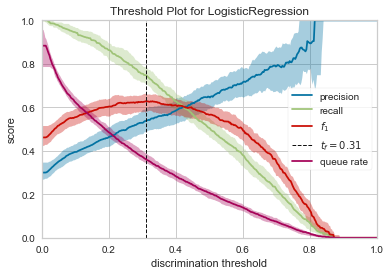

In [82]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.metrics import roc_auc_score,roc_curve,scorer
from sklearn.metrics import f1_score
import statsmodels.api as sm
from sklearn.metrics import precision_score,recall_score
from yellowbrick.classifier import DiscriminationThreshold
#splitting train and test data 
train,test = train_test_split(maindata,test_size = .25 ,random_state = 111)
    
##seperating dependent and independent variables
cols    = [i for i in maindata.columns if i not in Id_col + target_col]
train_X = train[cols]
train_Y = train[target_col]
test_X  = test[cols]
test_Y  = test[target_col]

#Function attributes
#dataframe     - processed dataframe
#Algorithm     - Algorithm used 
#training_x    - predictor variables dataframe(training)
#testing_x     - predictor variables dataframe(testing)
#training_y    - target variable(training)
#training_y    - target variable(testing)
#cf - ["coefficients","features"](cooefficients for logistic 
                                 #regression,features for tree based models)

#threshold_plot - if True returns threshold plot for model
    
def telecom_churn_prediction(algorithm,training_x,testing_x,
                             training_y,testing_y,cols,cf,threshold_plot) :
    
    #model
    algorithm.fit(training_x,training_y)
    predictions   = algorithm.predict(testing_x)
    probabilities = algorithm.predict_proba(testing_x)
    #coeffs
    if   cf == "coefficients" :
        coefficients  = pd.DataFrame(algorithm.coef_.ravel())
    elif cf == "features" :
        coefficients  = pd.DataFrame(algorithm.feature_importances_)
        
    column_df     = pd.DataFrame(cols)
    coef_sumry    = (pd.merge(coefficients,column_df,left_index= True,
                              right_index= True, how = "left"))
    coef_sumry.columns = ["coefficients","features"]
    coef_sumry    = coef_sumry.sort_values(by = "coefficients",ascending = False)
    
    print (algorithm)
    print ("\n Classification report : \n",classification_report(testing_y,predictions))
    print ("Accuracy   Score : ",accuracy_score(testing_y,predictions))
    #confusion matrix
    conf_matrix = confusion_matrix(testing_y,predictions)
    #roc_auc_score
    model_roc_auc = roc_auc_score(testing_y,predictions) 
    print ("Area under curve : ",model_roc_auc,"\n")
    fpr,tpr,thresholds = roc_curve(testing_y,probabilities[:,1])
    
    #plot confusion matrix
    trace1 = go.Heatmap(z = conf_matrix ,
                        x = ["Not churn","Churn"],
                        y = ["Not churn","Churn"],
                        showscale  = False,colorscale = "Picnic",
                        name = "matrix")
    
    #plot roc curve
    trace2 = go.Scatter(x = fpr,y = tpr,
                        name = "Roc : " + str(model_roc_auc),
                        line = dict(color = ('rgb(22, 96, 167)'),width = 2))
    trace3 = go.Scatter(x = [0,1],y=[0,1],
                        line = dict(color = ('rgb(205, 12, 24)'),width = 2,
                        dash = 'dot'))
    
    #plot coeffs
    trace4 = go.Bar(x = coef_sumry["features"],y = coef_sumry["coefficients"],
                    name = "coefficients",
                    marker = dict(color = coef_sumry["coefficients"],
                                  colorscale = "Picnic",
                                  line = dict(width = .6,color = "black")))
    
    #subplots
    fig = tls.make_subplots(rows=2, cols=2, specs=[[{}, {}], [{'colspan': 2}, None]],
                            subplot_titles=('Confusion Matrix',
                                            'Receiver operating characteristic',
                                            'Feature Importances'))
    
    fig.append_trace(trace1,1,1)
    fig.append_trace(trace2,1,2)
    fig.append_trace(trace3,1,2)
    fig.append_trace(trace4,2,1)
    
    fig['layout'].update(showlegend=False, title="Model performance" ,
                         autosize = False,height = 900,width = 800,
                         plot_bgcolor = 'rgba(240,240,240, 0.95)',
                         paper_bgcolor = 'rgba(240,240,240, 0.95)',
                         margin = dict(b = 195))
    fig["layout"]["xaxis2"].update(dict(title = "false positive rate"))
    fig["layout"]["yaxis2"].update(dict(title = "true positive rate"))
    fig["layout"]["xaxis3"].update(dict(showgrid = True,tickfont = dict(size = 10),
                                        tickangle = 90))
    py.iplot(fig)
    
    if threshold_plot == True : 
        visualizer = DiscriminationThreshold(algorithm)
        visualizer.fit(training_x,training_y)
        visualizer.poof()
        
logit  = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

telecom_churn_prediction(logit,train_X,test_X,train_Y,test_Y,
                         cols,"coefficients",threshold_plot = True)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

 Classification report : 
               precision    recall  f1-score   support

           0       0.87      0.81      0.84      1268
           1       0.59      0.70      0.64       490

    accuracy                           0.78      1758
   macro avg       0.73      0.76      0.74      1758
weighted avg       0.80      0.78      0.79      1758

Accuracy   Score :  0.7815699658703071
Area under curve :  0.7559196549282173 



/opt/anaconda3/lib/python3.7/site-packages/plotly/tools.py:465: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



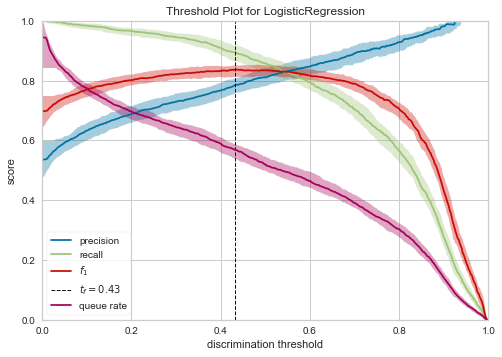

In [41]:
from imblearn.over_sampling import SMOTE

cols    = [i for i in maindata.columns if i not in Id_col+target_col]

smote_X = maindata[cols]
smote_Y = maindata[target_col]

#Split train and test data
smote_train_X,smote_test_X,smote_train_Y,smote_test_Y = train_test_split(smote_X,smote_Y,
                                                                         test_size = .25 ,
                                                                         random_state = 111)

#oversampling minority class using smote
os = SMOTE(random_state = 0)
os_smote_X,os_smote_Y = os.fit_sample(smote_train_X,smote_train_Y)
os_smote_X = pd.DataFrame(data = os_smote_X,columns=cols)
os_smote_Y = pd.DataFrame(data = os_smote_Y,columns=target_col)
###



logit_smote = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

telecom_churn_prediction(logit_smote,os_smote_X,test_X,os_smote_Y,test_Y,
                         cols,"coefficients",threshold_plot = True)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

 Classification report : 
               precision    recall  f1-score   support

           0       0.88      0.70      0.78      1268
           1       0.49      0.76      0.60       490

    accuracy                           0.71      1758
   macro avg       0.69      0.73      0.69      1758
weighted avg       0.77      0.71      0.73      1758

Accuracy   Score :  0.7138794084186576
Area under curve :  0.7284040430052148 



/opt/anaconda3/lib/python3.7/site-packages/plotly/tools.py:465: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



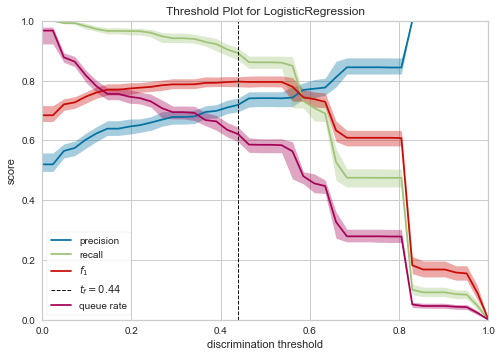

In [42]:
from sklearn.feature_selection import RFE

logit = LogisticRegression()

rfe = RFE(logit,10)
rfe = rfe.fit(os_smote_X,os_smote_Y.values.ravel())

rfe.support_
rfe.ranking_

#identified columns Recursive Feature Elimination
idc_rfe = pd.DataFrame({"rfe_support" :rfe.support_,
                       "columns" : [i for i in maindata.columns if i not in Id_col + target_col],
                       "ranking" : rfe.ranking_,
                      })
cols = idc_rfe[idc_rfe["rfe_support"] == True]["columns"].tolist()


#separating train and test data
train_rf_X = os_smote_X[cols]
train_rf_Y = os_smote_Y
test_rf_X  = test[cols]
test_rf_Y  = test[target_col]

logit_rfe = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
#applying model
telecom_churn_prediction(logit_rfe,train_rf_X,test_rf_X,train_rf_Y,test_rf_Y,
                         cols,"coefficients",threshold_plot = True)

tab_rk = ff.create_table(idc_rfe)
py.iplot(tab_rk)

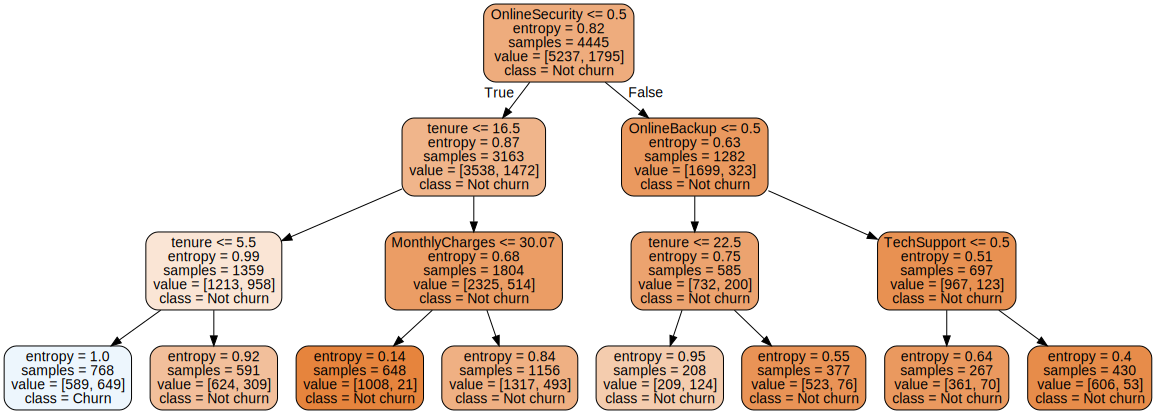

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=3, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

 Classification report : 
               precision    recall  f1-score   support

           0       0.77      0.96      0.86      1268
           1       0.74      0.27      0.40       490

    accuracy                           0.77      1758
   macro avg       0.76      0.62      0.63      1758
weighted avg       0.77      0.77      0.73      1758

Accuracy   Score :  0.7713310580204779
Area under curve :  0.6185958926157213 



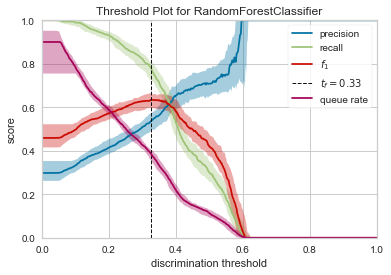

In [84]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn import tree
from graphviz import Source
from IPython.display import SVG,display

#function attributes
#columns  - column used
#nf_estimators   - The number of trees in the forest.
#estimated_tree  - tree number to be displayed
#maximum_depth   - depth of the tree
#criterion_type  - split criterion type ["gini" or "entropy"]
#Model performance - prints performance of model

def plot_tree_randomforest(columns,nf_estimators,
                           estimated_tree,maximum_depth,
                           criterion_type,model_performance = None) :
    
    dataframe = df_maindata_og[columns + target_col].copy()
    
    #train and test datasets
    rf_x     = dataframe[[i for i in columns if i not in target_col]]
    rf_y     = dataframe[target_col]
    
    #random forest classifier
    rfc   = RandomForestClassifier(n_estimators = nf_estimators,
                                   max_depth = maximum_depth,
                                   criterion = criterion_type,
                                  )
    rfc.fit(rf_x,rf_y)
    
    estimated_tree = rfc.estimators_[estimated_tree]
    
    graph = Source(tree.export_graphviz(estimated_tree,out_file=None,
                                        rounded=True,proportion = False,
                            feature_names = columns, 
                            precision  = 2,
                            class_names=["Not churn","Churn"],
                            filled = True))
    display(graph)
    
    #model performance
    if model_performance == True :
        telecom_churn_prediction(rfc,
                                 rf_x,test_X[columns],
                                 rf_y,test_Y,
                                 columns,"features",threshold_plot = True)
        

cols1 = [ i for i in train_X.columns if i not in target_col + Id_col] 
plot_tree_randomforest(cols1,100,99,3,"entropy",True)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.9, max_delta_step=0, max_depth=7,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=True, subsample=1, verbosity=1)

 Classification report : 
               precision    recall  f1-score   support

           0       0.82      0.83      0.83      1268
           1       0.55      0.54      0.55       490

    accuracy                           0.75      1758
   macro avg       0.69      0.69      0.69      1758
weighted avg       0.75      0.75      0.75      1758

Accuracy   Score :  0.7491467576791809
Area under curve :  0.685234661688019 



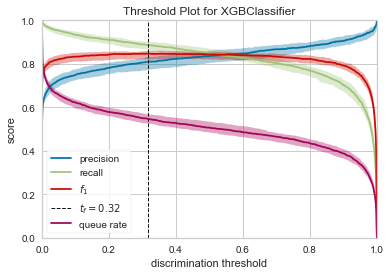

In [85]:
from xgboost import XGBClassifier

xgc = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
                    colsample_bytree=1, gamma=0, learning_rate=0.9, max_delta_step=0,
                    max_depth = 7, min_child_weight=1, missing=None, n_estimators=100,
                    n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
                    reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
                    silent=True, subsample=1)


telecom_churn_prediction(xgc,os_smote_X,test_X,os_smote_Y,test_Y,
                         cols,"features",threshold_plot = True)